# Training End-to-End Models

## Checking GPU Availability
First, let's see if we have a GPU available. It is highly recommended to utilize a GPU, although it is also possible to run this experiment on the CPU at a much slower rate.

In [1]:
from experiment import *
from data_utils import load_e2e_data


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print("Current device: " + str(device))


Current device: cuda


## Loading Training Data
Here, we define the paths to the images and their corresponding masks (targets).
The values for normalization are pre-computed from the training data in order to save time.
In case you want to reproduce all results from the paper, you need to run this notebook several times with different amount of training data. Remember that the actual number is 10-fold higher than what the start/stop inidices suggest, since we have every sample in 10 versions with different SNRs.

Because we wanted to compare the effect of using an increasing number of samples for training, we kept the validation data always the same for a fair and meaningful comparison of the results. Notice, (contrary to the training data) we don't apply any augmentation to the validation data.

In [2]:
train_dir = os.path.join(os.getcwd(), 'data', 'end2end', 'train')
mask_dir = os.path.join(os.getcwd(), 'data', 'masks', 'train')

# end2end
normalizer = {
        'norm_mean': [49],
        'norm_std': [56],
        }

start = 0
stop = 1000
#stop = 2000
#stop = 4000
#stop = 8000
train_dataset = load_e2e_data(train_dir, mask_dir, start, stop, normalizer, augment=True)

# this subset is always reserved as the validation set, regardless of the number of training samples
start = 9000
stop = 10000
val_dataset = load_e2e_data(train_dir, mask_dir, start, stop, normalizer)

print('Number of training samples: ' + str(len(train_dataset)))
print('Number of validation samples: ' + str(len(val_dataset)))

Number of training samples: 10000
Number of validation samples: 10000


## Creating the Architecture
Here, we create the actual architecture of our network, and set it up to be used in the previously determined device (cpu or cuda).

In [3]:
# this will give create the compact architecture...
model = get_cmp_thermunet().to(torch.device(device))

# ...or you could use the more complex architecture
#model = get_lrg_thermunet().to(torch.device(device))

## Inspecting the Architecture
We can have a look at the architecture and check for instance, if the number of parameters is what we expect.


In [4]:
from torchsummary import summary

device = torch.device('cuda' if next(model.parameters()).is_cuda else 'cpu')

summary(model, input_size=(1, 64, 256), device=str(device))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 16, 64, 256]             160
              ReLU-2          [-1, 16, 64, 256]               0
            Conv2d-3          [-1, 16, 64, 256]           2,320
              ReLU-4          [-1, 16, 64, 256]               0
     UNetConvBlock-5          [-1, 16, 64, 256]               0
            Conv2d-6          [-1, 32, 32, 128]           4,640
              ReLU-7          [-1, 32, 32, 128]               0
            Conv2d-8          [-1, 32, 32, 128]           9,248
              ReLU-9          [-1, 32, 32, 128]               0
    UNetConvBlock-10          [-1, 32, 32, 128]               0
           Conv2d-11           [-1, 64, 16, 64]          18,496
             ReLU-12           [-1, 64, 16, 64]               0
           Conv2d-13           [-1, 64, 16, 64]          36,928
             ReLU-14           [-1, 64,

## Training
Finally, we can start the training procedure.
The folder names to store the results are automatically generated and based on a timestamp.
They are always a subfolder of the training data folder.

In case you want to observe some random output samples during training, you can set the visualization_lvl to either 1 (plot validation data output samples) or 2 (plot validation and training data output samples).

Successfully created the directory E:\ThermUnet\data\end2end\train\2020-11-10_12-22-24.819706\models 
epoch  0


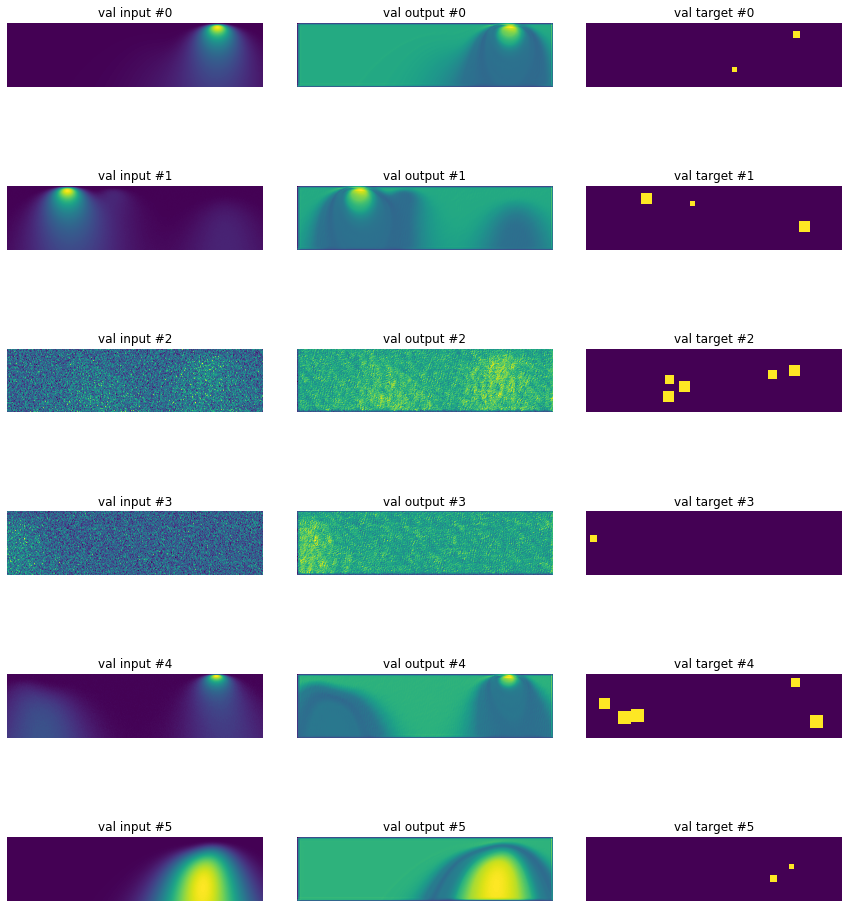

======================= epoch 0==========================
train loss: 0.05738765213266015
val loss: 0.6025200641751289
best val loss so far: 0.6025200641751289 (epoch 0)
======================= epoch 1==========================
train loss: 0.04031277987919748
val loss: 0.03908462980017066
best val loss so far: 0.03908462980017066 (epoch 1)
======================= epoch 2==========================
train loss: 0.03784339881502092
val loss: 0.0377131761405617
best val loss so far: 0.0377131761405617 (epoch 2)
======================= epoch 3==========================
train loss: 0.03598011529631913
val loss: 0.03501124714501202
best val loss so far: 0.03501124714501202 (epoch 3)
======================= epoch 4==========================
train loss: 0.03444183788914233
val loss: 0.03378293267358094
best val loss so far: 0.03378293267358094 (epoch 4)
epoch  5


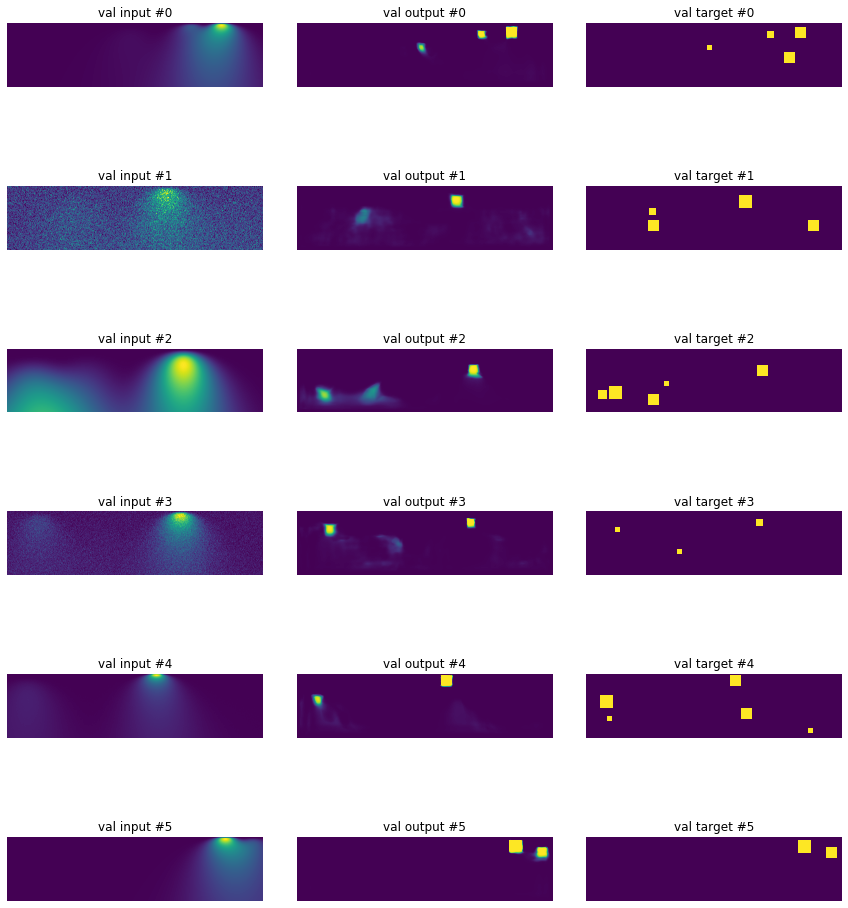

======================= epoch 5==========================
train loss: 0.033405103793367745
val loss: 0.03313849498145282
best val loss so far: 0.03313849498145282 (epoch 5)
======================= epoch 6==========================
train loss: 0.03275094720348716
val loss: 0.03242149822879583
best val loss so far: 0.03242149822879583 (epoch 6)
======================= epoch 7==========================
train loss: 0.032039609507657586
val loss: 0.03162219568528235
best val loss so far: 0.03162219568528235 (epoch 7)
======================= epoch 8==========================
train loss: 0.03139287875313312
val loss: 0.030272097195498646
best val loss so far: 0.030272097195498646 (epoch 8)
======================= epoch 9==========================
train loss: 0.030863895481452346
val loss: 0.029408398560248315
best val loss so far: 0.029408398560248315 (epoch 9)
epoch  10


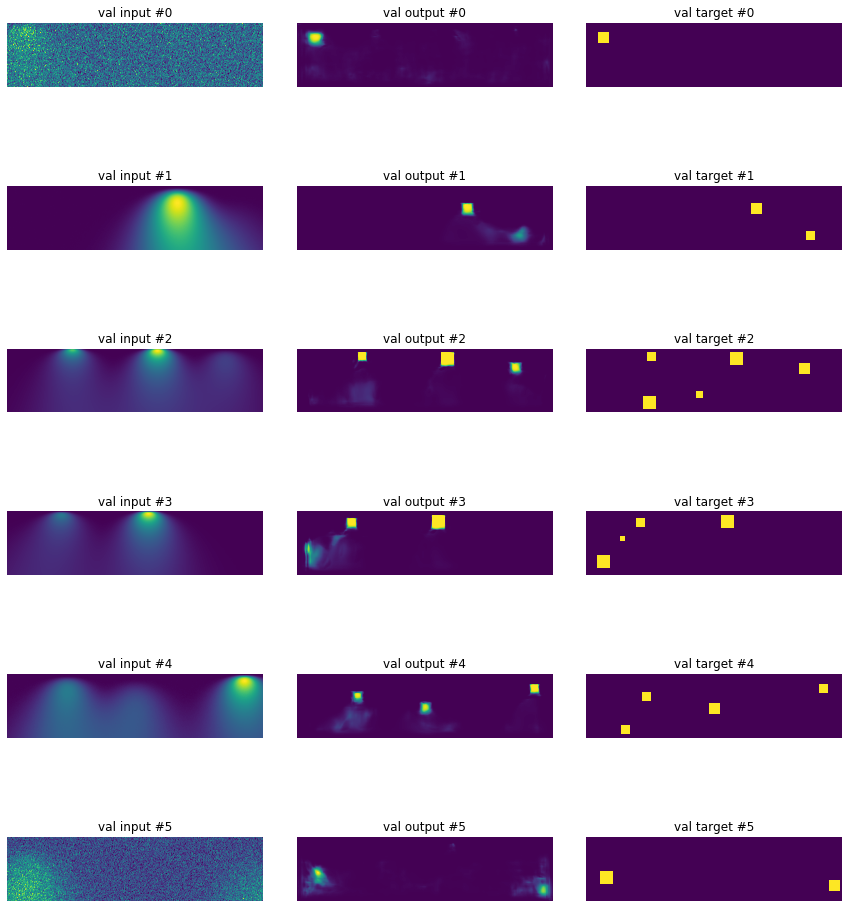

======================= epoch 10==========================
train loss: 0.030375140426680446
val loss: 0.029595205548219383
best val loss so far: 0.029408398560248315 (epoch 9)
======================= epoch 11==========================
train loss: 0.029957264308817684
val loss: 0.029805247503332792
best val loss so far: 0.029408398560248315 (epoch 9)
======================= epoch 12==========================
train loss: 0.02957621213886887
val loss: 0.028988277116790414
best val loss so far: 0.028988277116790414 (epoch 12)
======================= epoch 13==========================
train loss: 0.029113457387313246
val loss: 0.02869596984423697
best val loss so far: 0.02869596984423697 (epoch 13)
======================= epoch 14==========================
train loss: 0.02880765520595014
val loss: 0.027745198406279085
best val loss so far: 0.027745198406279085 (epoch 14)
epoch  15


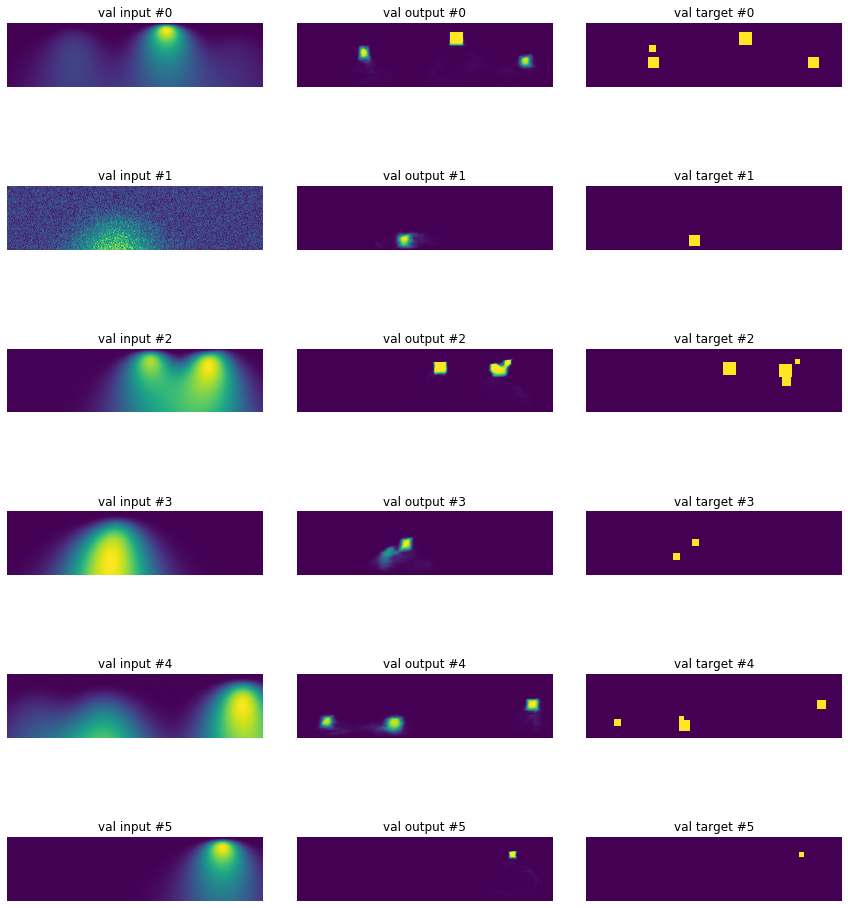

======================= epoch 15==========================
train loss: 0.028483000053092837
val loss: 0.028427680266089737
best val loss so far: 0.027745198406279085 (epoch 14)
======================= epoch 16==========================
train loss: 0.02820853674598038
val loss: 0.02767281835991889
best val loss so far: 0.02767281835991889 (epoch 16)
======================= epoch 17==========================
train loss: 0.02784344793204218
val loss: 0.028174728446640075
best val loss so far: 0.02767281835991889 (epoch 16)
======================= epoch 18==========================
train loss: 0.027631048531271518
val loss: 0.02754113263171166
best val loss so far: 0.02754113263171166 (epoch 18)
======================= epoch 19==========================
train loss: 0.02736673208605498
val loss: 0.02672731324005872
best val loss so far: 0.02672731324005872 (epoch 19)
epoch  20


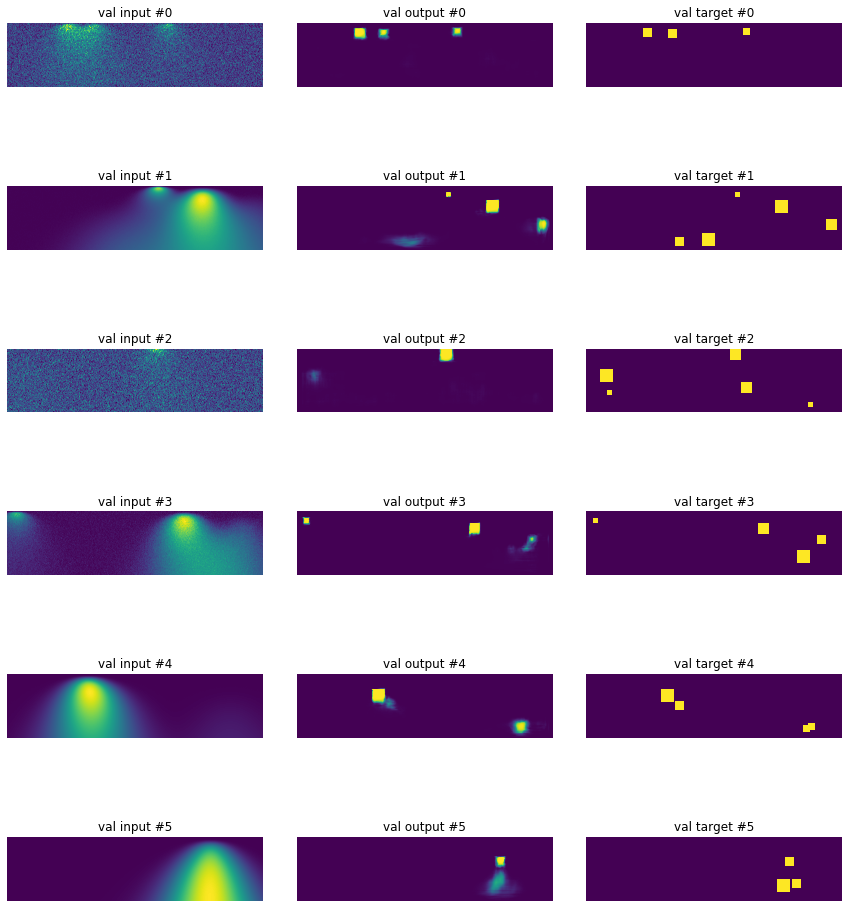

======================= epoch 20==========================
train loss: 0.027195744531229138
val loss: 0.027649664368480445
best val loss so far: 0.02672731324005872 (epoch 19)
======================= epoch 21==========================
train loss: 0.02712255495041609
val loss: 0.027525163725949823
best val loss so far: 0.02672731324005872 (epoch 19)
======================= epoch 22==========================
train loss: 0.027008435947354883
val loss: 0.027283798126503826
best val loss so far: 0.02672731324005872 (epoch 19)
======================= epoch 23==========================
train loss: 0.026786959616467355
val loss: 0.0266804716642946
best val loss so far: 0.0266804716642946 (epoch 23)
======================= epoch 24==========================
train loss: 0.02663493948802352
val loss: 0.0269991902904585
best val loss so far: 0.0266804716642946 (epoch 23)
epoch  25


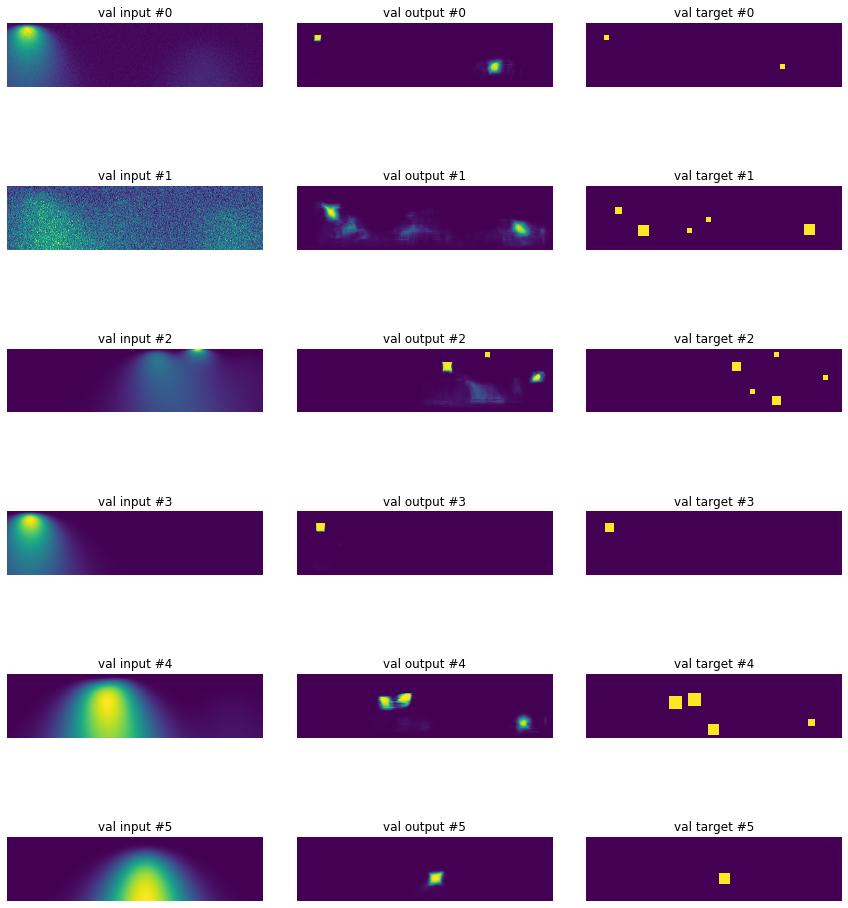

======================= epoch 25==========================
train loss: 0.02649942489247769
val loss: 0.02643649491481483
best val loss so far: 0.02643649491481483 (epoch 25)
======================= epoch 26==========================
train loss: 0.02635939260479063
val loss: 0.02652235114015639
best val loss so far: 0.02643649491481483 (epoch 25)
======================= epoch 27==========================
train loss: 0.026191939193755388
val loss: 0.026329827314242722
best val loss so far: 0.026329827314242722 (epoch 27)
======================= epoch 28==========================
train loss: 0.025977056509349495
val loss: 0.027771988013759255
best val loss so far: 0.026329827314242722 (epoch 27)
======================= epoch 29==========================
train loss: 0.025896977216936647
val loss: 0.026236420302651824
best val loss so far: 0.026236420302651824 (epoch 29)
epoch  30


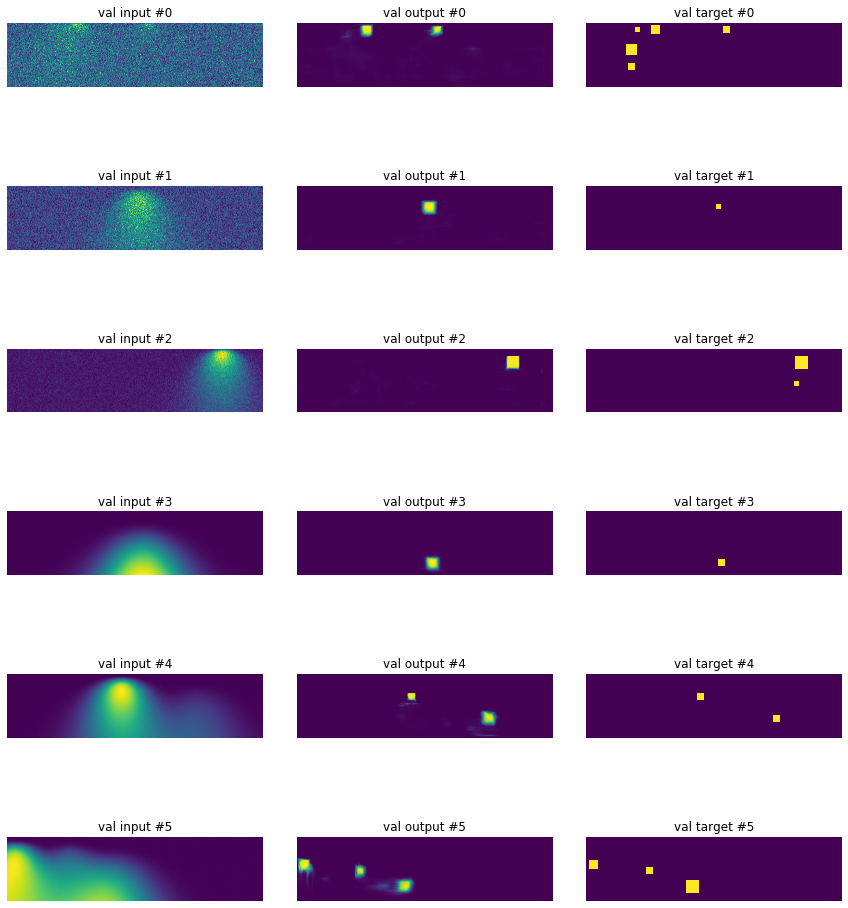

======================= epoch 30==========================
train loss: 0.025795069557614625
val loss: 0.026523395637050272
best val loss so far: 0.026236420302651824 (epoch 29)
======================= epoch 31==========================
train loss: 0.025650891803205015
val loss: 0.026093230991624295
best val loss so far: 0.026093230991624295 (epoch 31)
======================= epoch 32==========================
train loss: 0.02562608799804002
val loss: 0.026174754237290473
best val loss so far: 0.026093230991624295 (epoch 31)
======================= epoch 33==========================
train loss: 0.02555904969666153
val loss: 0.026644681751728058
best val loss so far: 0.026093230991624295 (epoch 31)
======================= epoch 34==========================
train loss: 0.0254106242088601
val loss: 0.026120977762155235
best val loss so far: 0.026093230991624295 (epoch 31)
epoch  35


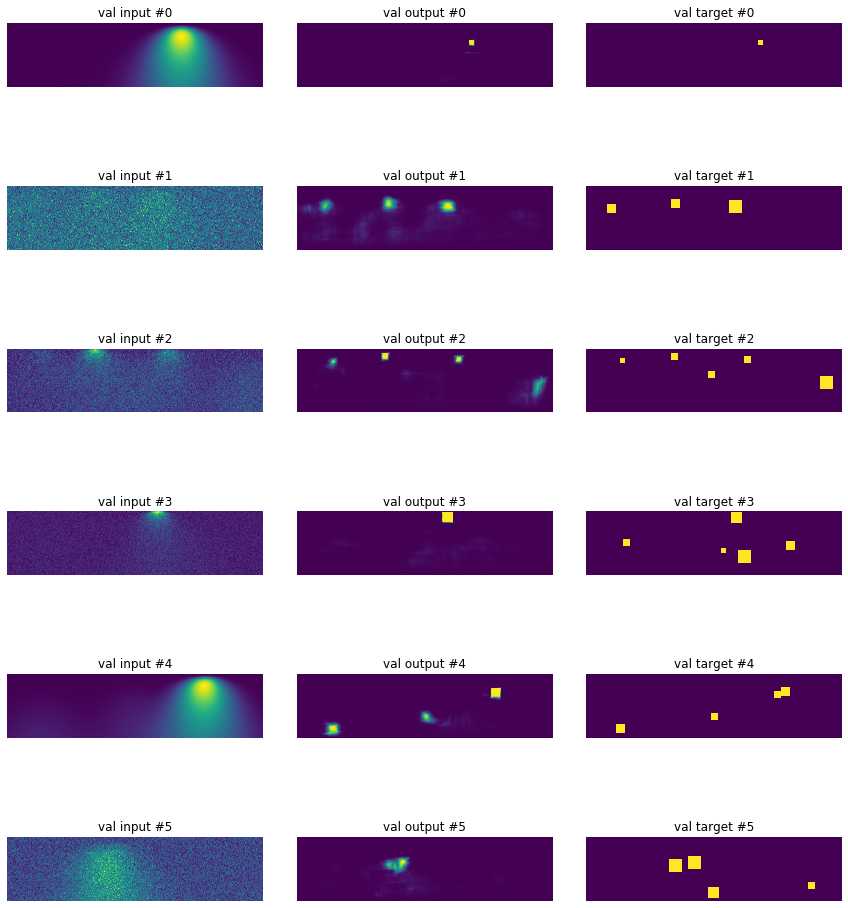

======================= epoch 35==========================
train loss: 0.025300105249509215
val loss: 0.026912421762011945
best val loss so far: 0.026093230991624295 (epoch 31)
======================= epoch 36==========================
train loss: 0.025292739771306513
val loss: 0.02640698939654976
best val loss so far: 0.026093230991624295 (epoch 31)
======================= epoch 37==========================
train loss: 0.025163723547011616
val loss: 0.026298416561447085
best val loss so far: 0.026093230991624295 (epoch 31)
======================= epoch 38==========================
train loss: 0.02510746259847656
val loss: 0.026194937097840012
best val loss so far: 0.026093230991624295 (epoch 31)
======================= epoch 39==========================
train loss: 0.024878279027529062
val loss: 0.026212908333167435
best val loss so far: 0.026093230991624295 (epoch 31)
epoch  40


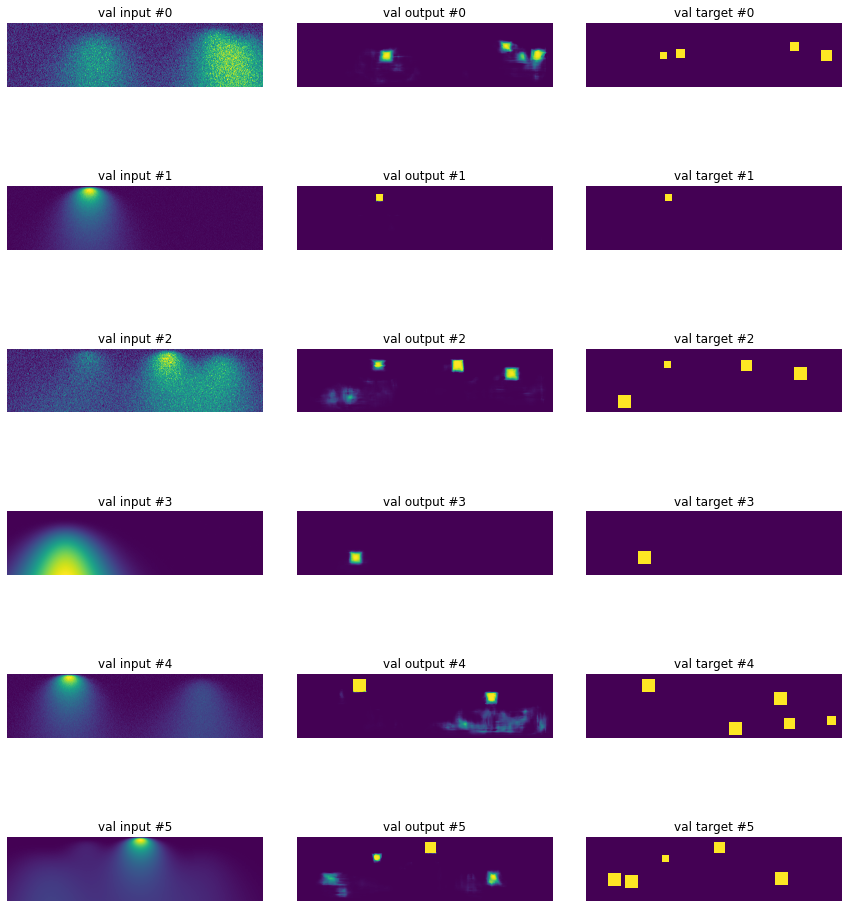

======================= epoch 40==========================
train loss: 0.02475676328036934
val loss: 0.02610452269157395
best val loss so far: 0.026093230991624295 (epoch 31)
======================= epoch 41==========================
train loss: 0.024738261558115482
val loss: 0.02667039099615067
best val loss so far: 0.026093230991624295 (epoch 31)
======================= epoch 42==========================
train loss: 0.02475817838963121
val loss: 0.02617370204627514
best val loss so far: 0.026093230991624295 (epoch 31)
======================= epoch 43==========================
train loss: 0.024495114063844085
val loss: 0.02568713555857539
best val loss so far: 0.02568713555857539 (epoch 43)
======================= epoch 44==========================
train loss: 0.024569910416845232
val loss: 0.02588530030287802
best val loss so far: 0.02568713555857539 (epoch 43)
epoch  45


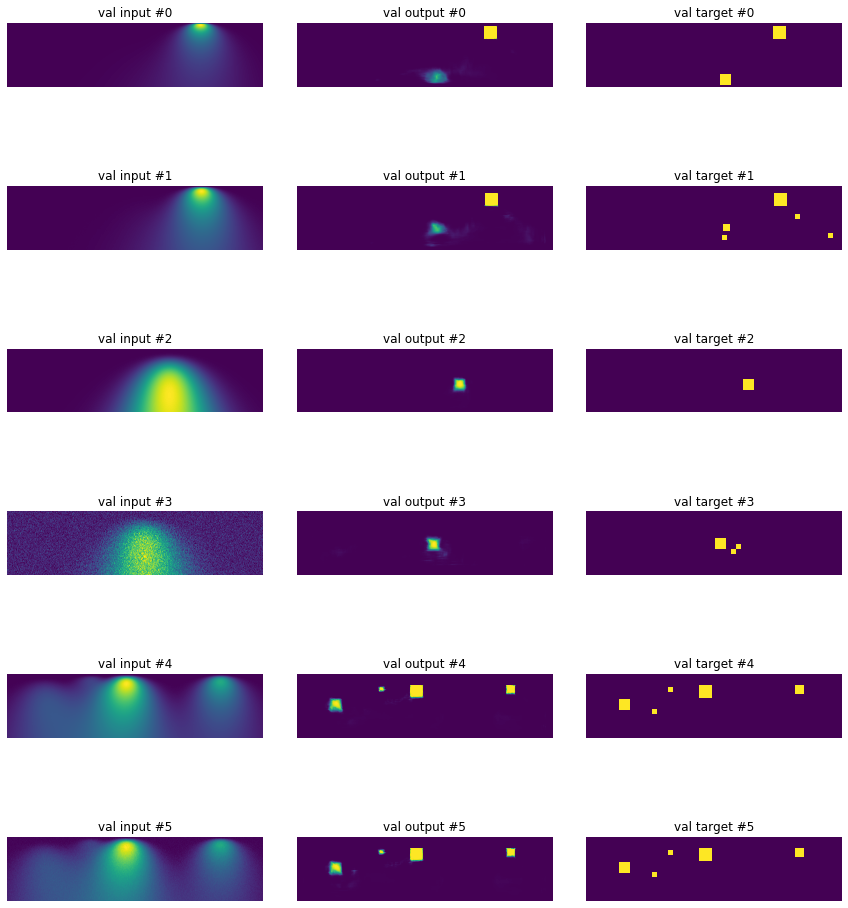

======================= epoch 45==========================
train loss: 0.024490918630734087
val loss: 0.025925810129381718
best val loss so far: 0.02568713555857539 (epoch 43)
======================= epoch 46==========================
train loss: 0.024546903672628104
val loss: 0.025879022350534797
best val loss so far: 0.02568713555857539 (epoch 43)
======================= epoch 47==========================
train loss: 0.024354451555758716
val loss: 0.025855507627129556
best val loss so far: 0.02568713555857539 (epoch 43)
======================= epoch 48==========================
train loss: 0.024319820320699365
val loss: 0.026869180785492063
best val loss so far: 0.02568713555857539 (epoch 43)
======================= epoch 49==========================
train loss: 0.024241061065346004
val loss: 0.025811644848436118
best val loss so far: 0.02568713555857539 (epoch 43)
epoch  50


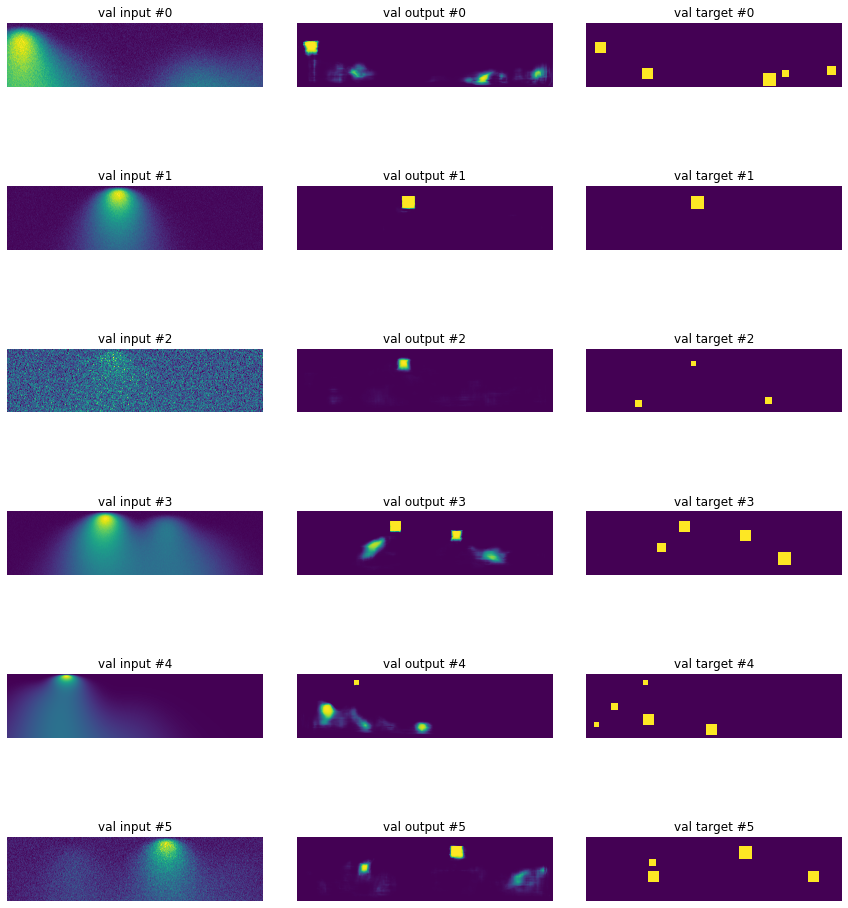

======================= epoch 50==========================
train loss: 0.024206044799648226
val loss: 0.02551639158045873
best val loss so far: 0.02551639158045873 (epoch 50)
======================= epoch 51==========================
train loss: 0.024026667178608477
val loss: 0.026260726442560552
best val loss so far: 0.02551639158045873 (epoch 50)
======================= epoch 52==========================
train loss: 0.02407131495140493
val loss: 0.025864276320673524
best val loss so far: 0.02551639158045873 (epoch 50)
======================= epoch 53==========================
train loss: 0.02397345165349543
val loss: 0.02526921095699072
best val loss so far: 0.02526921095699072 (epoch 53)
======================= epoch 54==========================
train loss: 0.023953287460841237
val loss: 0.025555518868844957
best val loss so far: 0.02526921095699072 (epoch 53)
epoch  55


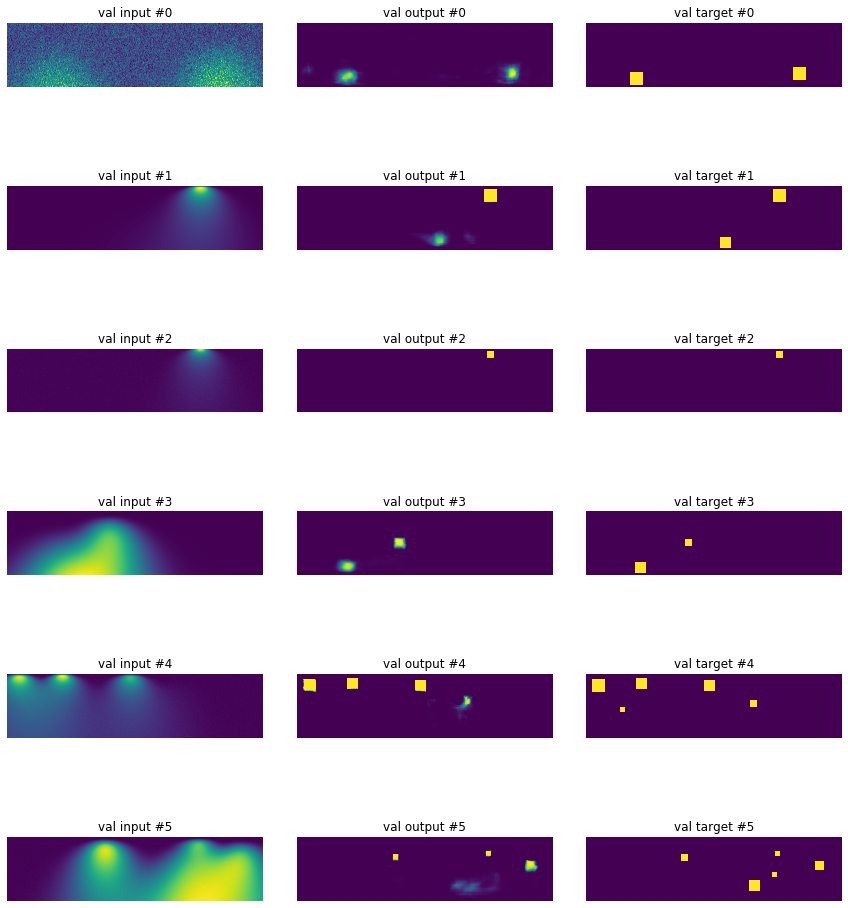

======================= epoch 55==========================
train loss: 0.02394720778055489
val loss: 0.02592663126438856
best val loss so far: 0.02526921095699072 (epoch 53)
======================= epoch 56==========================
train loss: 0.02378319656429812
val loss: 0.026142138216644524
best val loss so far: 0.02526921095699072 (epoch 53)
======================= epoch 57==========================
train loss: 0.02371939580421895
val loss: 0.02559835337847471
best val loss so far: 0.02526921095699072 (epoch 53)
======================= epoch 58==========================
train loss: 0.023769460625946523
val loss: 0.025439315173774957
best val loss so far: 0.02526921095699072 (epoch 53)
======================= epoch 59==========================
train loss: 0.02380780906509608
val loss: 0.026046872433274984
best val loss so far: 0.02526921095699072 (epoch 53)
epoch  60


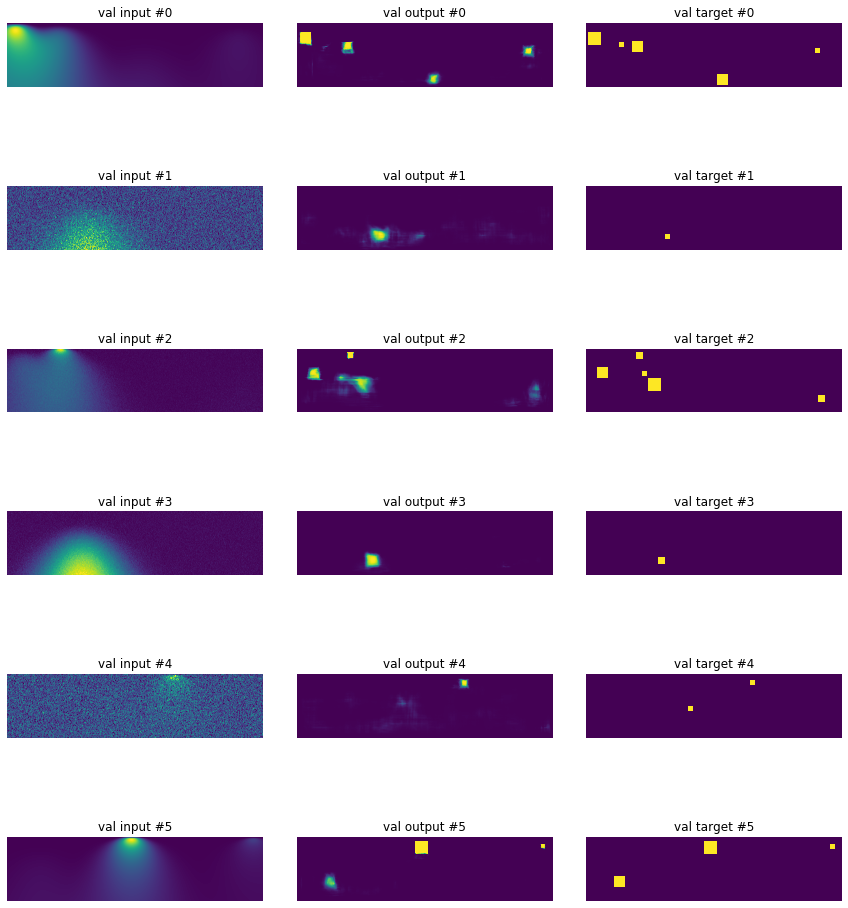

======================= epoch 60==========================
train loss: 0.023540462165139615
val loss: 0.026632379662711172
best val loss so far: 0.02526921095699072 (epoch 53)
======================= epoch 61==========================
train loss: 0.023591647755354644
val loss: 0.02531780679570511
best val loss so far: 0.02526921095699072 (epoch 53)
======================= epoch 62==========================
train loss: 0.02350886281207204
val loss: 0.026071144603192806
best val loss so far: 0.02526921095699072 (epoch 53)
======================= epoch 63==========================
train loss: 0.02349328903760761
val loss: 0.02603160048648715
best val loss so far: 0.02526921095699072 (epoch 53)
======================= epoch 64==========================
train loss: 0.023418207244947552
val loss: 0.025785252056084573
best val loss so far: 0.02526921095699072 (epoch 53)
epoch  65


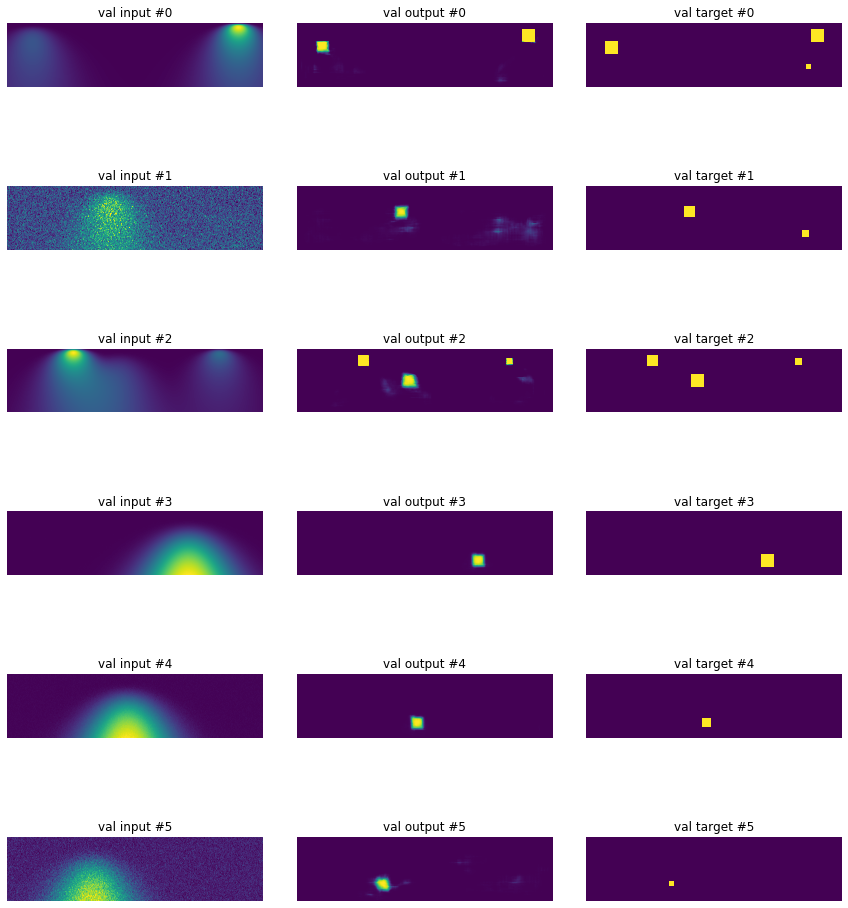

======================= epoch 65==========================
train loss: 0.02339038783684373
val loss: 0.02629363132826984
best val loss so far: 0.02526921095699072 (epoch 53)
======================= epoch 66==========================
train loss: 0.02336757371108979
val loss: 0.025984489425085484
best val loss so far: 0.02526921095699072 (epoch 53)
======================= epoch 67==========================
train loss: 0.02314933053776622
val loss: 0.025772310404572635
best val loss so far: 0.02526921095699072 (epoch 53)
======================= epoch 68==========================
train loss: 0.02317324091400951
val loss: 0.02658507771138102
best val loss so far: 0.02526921095699072 (epoch 53)
======================= epoch 69==========================
train loss: 0.023133289991877973
val loss: 0.025654146811924874
best val loss so far: 0.02526921095699072 (epoch 53)
epoch  70


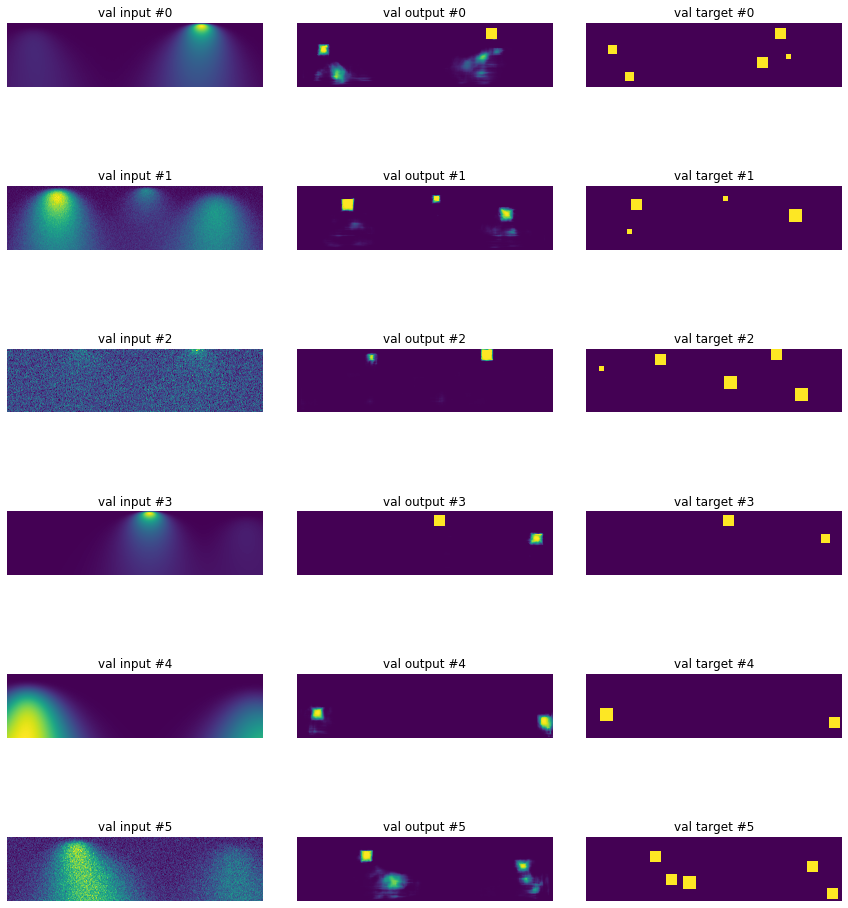

======================= epoch 70==========================
train loss: 0.023059268170036375
val loss: 0.025803144018165768
best val loss so far: 0.02526921095699072 (epoch 53)
======================= epoch 71==========================
train loss: 0.023022000938188285
val loss: 0.026095033751800657
best val loss so far: 0.02526921095699072 (epoch 53)
======================= epoch 72==========================
train loss: 0.023075383102521302
val loss: 0.02593667407799512
best val loss so far: 0.02526921095699072 (epoch 53)
======================= epoch 73==========================
train loss: 0.022976618908345698
val loss: 0.026214609766379
best val loss so far: 0.02526921095699072 (epoch 53)
======================= epoch 74==========================
train loss: 0.02287789192656055
val loss: 0.026489955195225776
best val loss so far: 0.02526921095699072 (epoch 53)
epoch  75


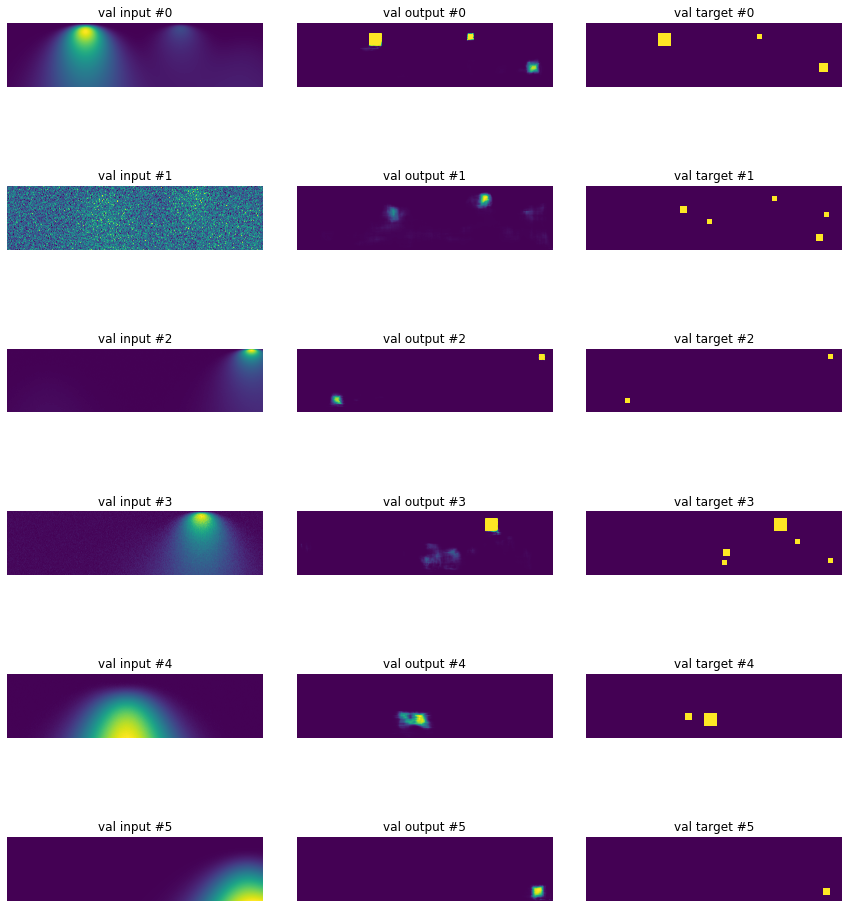

======================= epoch 75==========================
train loss: 0.022808312639594076
val loss: 0.025707672012038527
best val loss so far: 0.02526921095699072 (epoch 53)
======================= epoch 76==========================
train loss: 0.022915840717963876
val loss: 0.025989552168175577
best val loss so far: 0.02526921095699072 (epoch 53)
======================= epoch 77==========================
train loss: 0.022886576989665626
val loss: 0.025333285612985493
best val loss so far: 0.02526921095699072 (epoch 53)
======================= epoch 78==========================
train loss: 0.022752139069605617
val loss: 0.026269421183504164
best val loss so far: 0.02526921095699072 (epoch 53)
======================= epoch 79==========================
train loss: 0.022675562847871332
val loss: 0.027229066687636076
best val loss so far: 0.02526921095699072 (epoch 53)
epoch  80


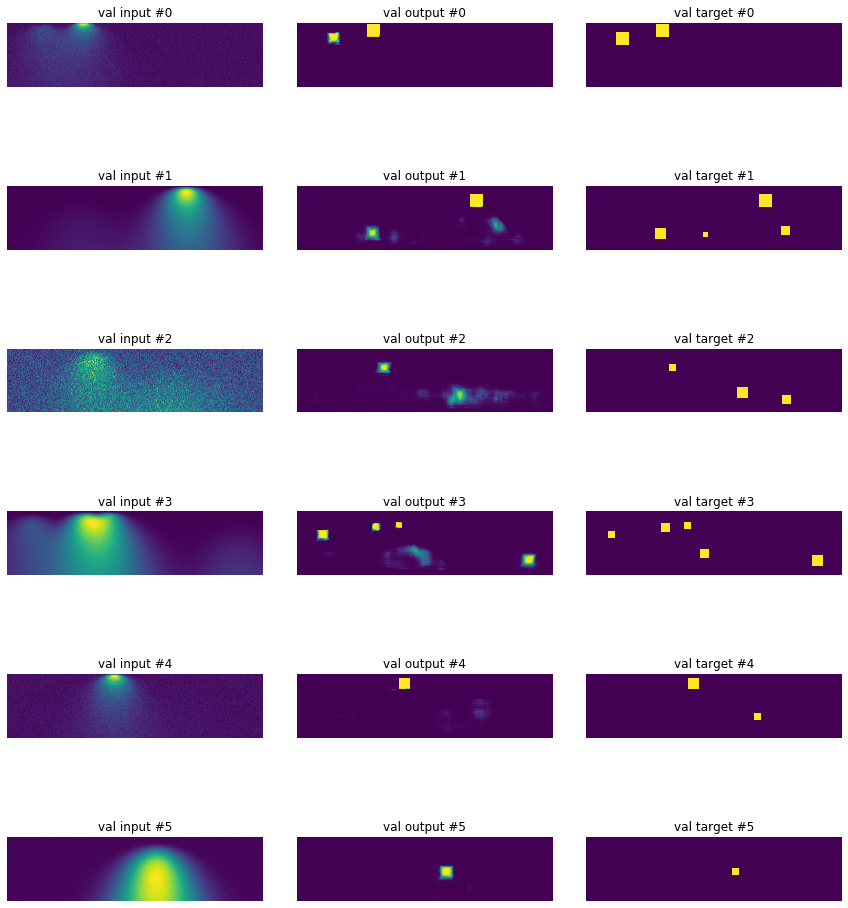

======================= epoch 80==========================
train loss: 0.022577672777697445
val loss: 0.026018132837489247
best val loss so far: 0.02526921095699072 (epoch 53)
======================= epoch 81==========================
train loss: 0.022641532704234125
val loss: 0.025419267130084335
best val loss so far: 0.02526921095699072 (epoch 53)
======================= epoch 82==========================
train loss: 0.02263319389382377
val loss: 0.025889097806066276
best val loss so far: 0.02526921095699072 (epoch 53)
======================= epoch 83==========================
train loss: 0.022501694831997158
val loss: 0.02585488209500909
best val loss so far: 0.02526921095699072 (epoch 53)
======================= epoch 84==========================
train loss: 0.022635521538555622
val loss: 0.02662826608493924
best val loss so far: 0.02526921095699072 (epoch 53)
epoch  85


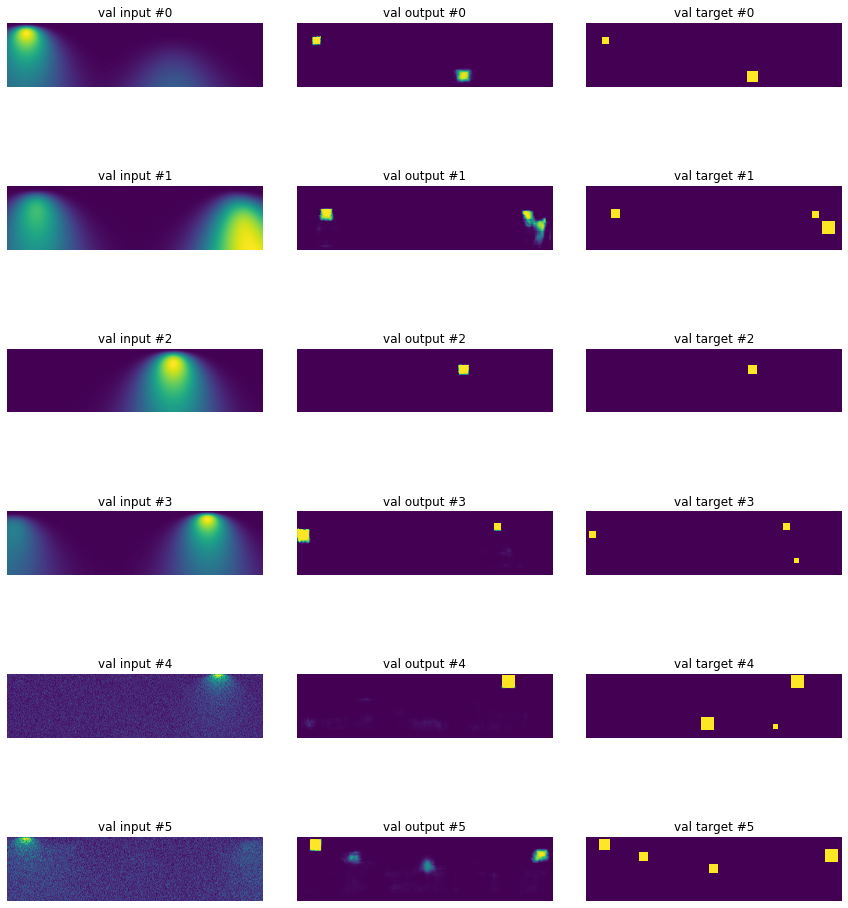

======================= epoch 85==========================
train loss: 0.022424915126524867
val loss: 0.025981773572973908
best val loss so far: 0.02526921095699072 (epoch 53)
======================= epoch 86==========================
train loss: 0.022527201849967243
val loss: 0.02645277892705053
best val loss so far: 0.02526921095699072 (epoch 53)
======================= epoch 87==========================
train loss: 0.022447258248925208
val loss: 0.026194951919838786
best val loss so far: 0.02526921095699072 (epoch 53)
======================= epoch 88==========================
train loss: 0.022378118097316473
val loss: 0.026217484862543643
best val loss so far: 0.02526921095699072 (epoch 53)
======================= epoch 89==========================
train loss: 0.022336021532304583
val loss: 0.026071589482482522
best val loss so far: 0.02526921095699072 (epoch 53)
epoch  90


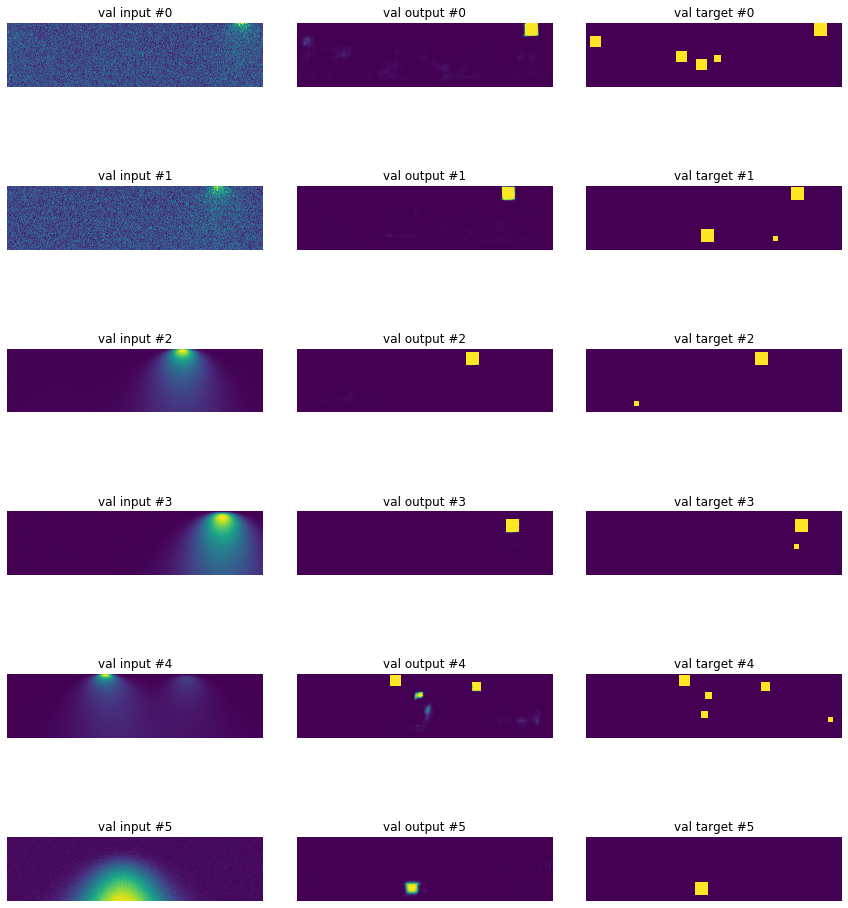

======================= epoch 90==========================
train loss: 0.022330659111961724
val loss: 0.026859548307955266
best val loss so far: 0.02526921095699072 (epoch 53)
======================= epoch 91==========================
train loss: 0.022220153166446835
val loss: 0.02619176649302244
best val loss so far: 0.02526921095699072 (epoch 53)
======================= epoch 92==========================
train loss: 0.022278839520644397
val loss: 0.02605776493623853
best val loss so far: 0.02526921095699072 (epoch 53)
======================= epoch 93==========================
train loss: 0.022191031786613167
val loss: 0.026076522173825653
best val loss so far: 0.02526921095699072 (epoch 53)
======================= epoch 94==========================
train loss: 0.022107910051010548
val loss: 0.0258691295851022
best val loss so far: 0.02526921095699072 (epoch 53)
epoch  95


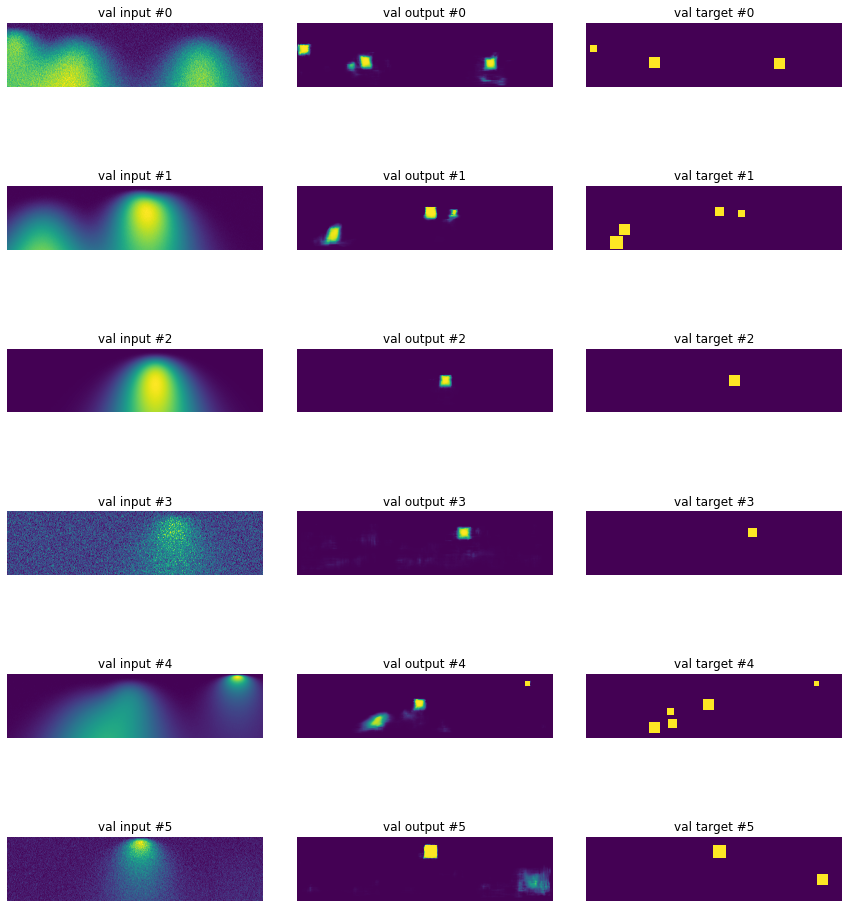

======================= epoch 95==========================
train loss: 0.022164692677557468
val loss: 0.02598941326793283
best val loss so far: 0.02526921095699072 (epoch 53)
======================= epoch 96==========================
train loss: 0.02211819751188159
val loss: 0.02601127942185849
best val loss so far: 0.02526921095699072 (epoch 53)
======================= epoch 97==========================
train loss: 0.022051505798473953
val loss: 0.025580224786885083
best val loss so far: 0.02526921095699072 (epoch 53)
======================= epoch 98==========================
train loss: 0.02196241403417662
val loss: 0.02568522516824305
best val loss so far: 0.02526921095699072 (epoch 53)
======================= epoch 99==========================
train loss: 0.022072651367634536
val loss: 0.026293247738853096
best val loss so far: 0.02526921095699072 (epoch 53)
training finished...


In [5]:
epochs = 100
visualization_lvl = 1

train(model, train_dataset, val_dataset, epochs, visualization_lvl)

print("training finished...")    